In [296]:
from sklearn import metrics
import matplotlib.pyplot as plt


In [297]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 17 15:11:36 2020
@author: bwilliams
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_cleaner(df):
    data = df.copy()
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

##### New way to generate the data

def data_generator(df):
    '''
    input:
        df: dataframe to split stratified by variable class
        class: string with variable to use as response and as variable to stratify by
    output:
        X_train, y_train: variables and response 60% data 
        X_val, y_val: variables and response 20% data 
        X_trainval, y_trainval: variables and response 80% data (for cross validation)
        X_test, y_test: variables and response 20% data 
    '''
    
    X = df.drop(["class2","class4"], axis=1)
    y = df['class4']

    return X, y


def convert_binary(y):
    '''
    Parameters
    ----------
    y : repsonse variable with 4 classes
    Returns
    -------
    y : reponse variable 2 classes
    '''
    y_bin = np.where(y == "nonevent", "nonevent","event")
    return y_bin

#test with answers
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/npf_test.csv"
df = pd.read_csv(url)
df = data_cleaner(df)

X_ans,y_ans = data_generator(df)


# If needed conversion from 4 classes to binary classes
y_ans_bin = convert_binary(y_ans)






In [298]:
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/bin/answers.csv"
ans = pd.read_csv(url)
ans.drop(["class4"],0,inplace=True)

ans_class = ans.index
ans_class_bin = convert_binary(ans_class)

ans.head()
probs = ans.iloc[:,0].values


predictions vs reality 0.6787564766839378


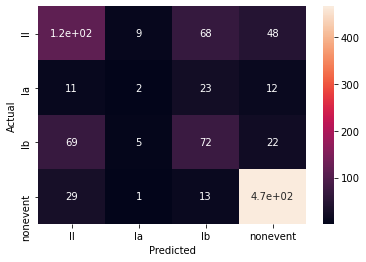

In [299]:
import seaborn as sns

print('predictions vs reality',metrics.accuracy_score(y_ans, ans_class))


confusion_matrix = pd.crosstab(y_ans, ans_class, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


predictions vs reality 0.8704663212435233


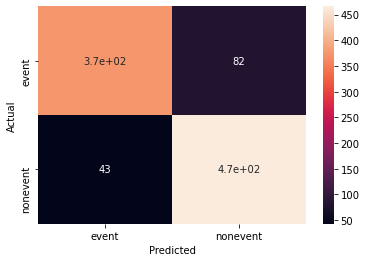

In [300]:

print('predictions vs reality',metrics.accuracy_score(y_ans_bin, ans_class_bin))


confusion_matrix = pd.crosstab(y_ans_bin, ans_class_bin, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
#gives double false negatives



In [301]:
np.std(X_ans)

CO2168.mean    11.061556
CO2168.std      3.374626
CO2336.mean    11.028459
CO2336.std      3.138763
CO242.mean     10.664660
                 ...    
UV_A.std        4.948165
UV_B.mean       0.305897
UV_B.std        0.278218
CS.mean         0.002182
CS.std          0.000635
Length: 100, dtype: float64

In [302]:
covMatrix = np.cov(X_ans,bias=True)


In [303]:
print(covMatrix)


[[25638.09744345 22049.16326495 20619.18032882 ... 22625.77072505
  23430.73493787 21977.817794  ]
 [22049.16326495 22285.79974515 21055.63615377 ... 22527.26274872
  22402.01893113 21844.45422195]
 [20619.18032882 21055.63615377 20324.27436545 ... 21331.01159635
  21119.7288631  20839.51027482]
 ...
 [22625.77072505 22527.26274872 21331.01159635 ... 22837.13473116
  22784.44317428 22153.68083167]
 [23430.73493787 22402.01893113 21119.7288631  ... 22784.44317428
  23011.66137974 22111.7560563 ]
 [21977.817794   21844.45422195 20839.51027482 ... 22153.68083167
  22111.7560563  21599.76037234]]


In [304]:
#visualise what we got wrong
import statistics

ans_data = pd.DataFrame(np.c_[df,ans.index])

cols = [102] + [col for col in ans_data if col != 102]
ans_data = ans_data[cols]

correct = ans_data[ans_data[102]==ans_data[1]]
wrong = ans_data[ans_data[102]!=ans_data[1]]

df_correct = pd.DataFrame(correct)
df_wrong = pd.DataFrame(wrong)

corr = df_correct.corr()
df_correct.head()

,102,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,100,101
2,nonevent,nonevent,nonevent,380.339,0.928028,380.316,0.917636,380.55,0.936683,380.301,...,1.28498,0.379219,1.73785,0.365878,0.720849,0.427279,0.0151789,0.0104708,0.00233441,0.00034727
3,Ib,event,Ib,381.048,1.29008,381.231,1.24549,381.359,1.81787,381.29,...,10.2983,3.2811,11.1486,3.47868,19.5687,14.4805,0.783038,0.703191,0.00186788,0.000593644
5,Ib,event,Ib,381.804,0.174819,381.8,0.167803,382.015,0.254768,381.778,...,-6.48417,2.32461,-5.48893,2.39159,10.6256,6.67635,0.243887,0.182965,0.0014845,0.000132264
6,II,event,II,381.466,7.37622,381.328,6.67793,383.152,9.31825,380.875,...,21.5466,2.97303,22.1619,3.84099,22.2811,15.6367,1.07732,0.93635,0.00573921,0.000615564
7,II,event,II,368.388,5.32384,367.802,4.40871,369.788,7.02958,367.515,...,10.9647,1.7724,11.6236,2.41078,11.6957,9.17349,0.425933,0.400514,0.0050785,0.00365834


In [305]:
# Read npf_train to get real column names
npf_train = pd.read_csv("cleaned_data/npf_train.csv", index_col="id")
npf_train.head()

# Get col names
col_names = list(npf_train.columns)

# Add first "true_class4"
col_names = ["true_class4"] + col_names

# Rename class4 and class2 to pred_class4 and pred_class2
col_names[1] = "pred_class2"
col_names[2] = "pred_class4"

In [313]:
# Set names to correct and wrong and change feature type to float
df_correct.columns = col_names
df_correct = df_correct.infer_objects()

df_wrong.columns = col_names
df_wrong = df_wrong.infer_objects()

df_correct
#df_wrong

,true_class4,pred_class2,pred_class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
2,nonevent,nonevent,nonevent,380.338929,0.928028,380.315833,0.917636,380.550119,0.936683,380.301446,...,1.284980,0.379219,1.737849,0.365878,0.720849,0.427279,0.015179,0.010471,0.002334,0.000347
3,Ib,event,Ib,381.047644,1.290080,381.231149,1.245494,381.358678,1.817869,381.290057,...,10.298284,3.281097,11.148552,3.478676,19.568691,14.480491,0.783038,0.703191,0.001868,0.000594
5,Ib,event,Ib,381.803704,0.174819,381.799722,0.167803,382.014862,0.254768,381.778073,...,-6.484172,2.324609,-5.488926,2.391585,10.625554,6.676355,0.243887,0.182965,0.001485,0.000132
6,II,event,II,381.465904,7.376216,381.328138,6.677932,383.152086,9.318246,380.874947,...,21.546601,2.973035,22.161941,3.840992,22.281053,15.636701,1.077320,0.936350,0.005739,0.000616
7,II,event,II,368.388341,5.323841,367.801834,4.408715,369.788478,7.029583,367.514934,...,10.964738,1.772399,11.623595,2.410785,11.695691,9.173489,0.425933,0.400514,0.005079,0.003658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,Ib,event,Ib,376.937432,0.750583,377.128041,0.762031,377.156419,0.894934,377.217365,...,7.911340,3.027945,8.677038,3.057118,17.384662,11.209838,0.639317,0.512457,0.001174,0.000261
961,II,event,II,363.722787,5.818945,363.644809,5.421855,364.529615,5.998013,363.332363,...,13.460119,1.602013,14.151279,2.442529,15.466702,12.041102,0.674690,0.621847,0.003541,0.000983
962,nonevent,nonevent,nonevent,393.455333,0.302987,393.546800,0.269284,393.167200,0.349871,393.569867,...,-2.141411,0.279000,-1.439793,0.292972,2.817411,1.925849,0.081280,0.060592,0.002573,0.000181
963,II,event,II,399.839114,1.041056,399.891266,1.053666,399.902564,1.003625,399.874177,...,-4.762440,0.786920,-4.118829,0.703377,5.073407,3.041730,0.094426,0.062122,0.001528,0.000230


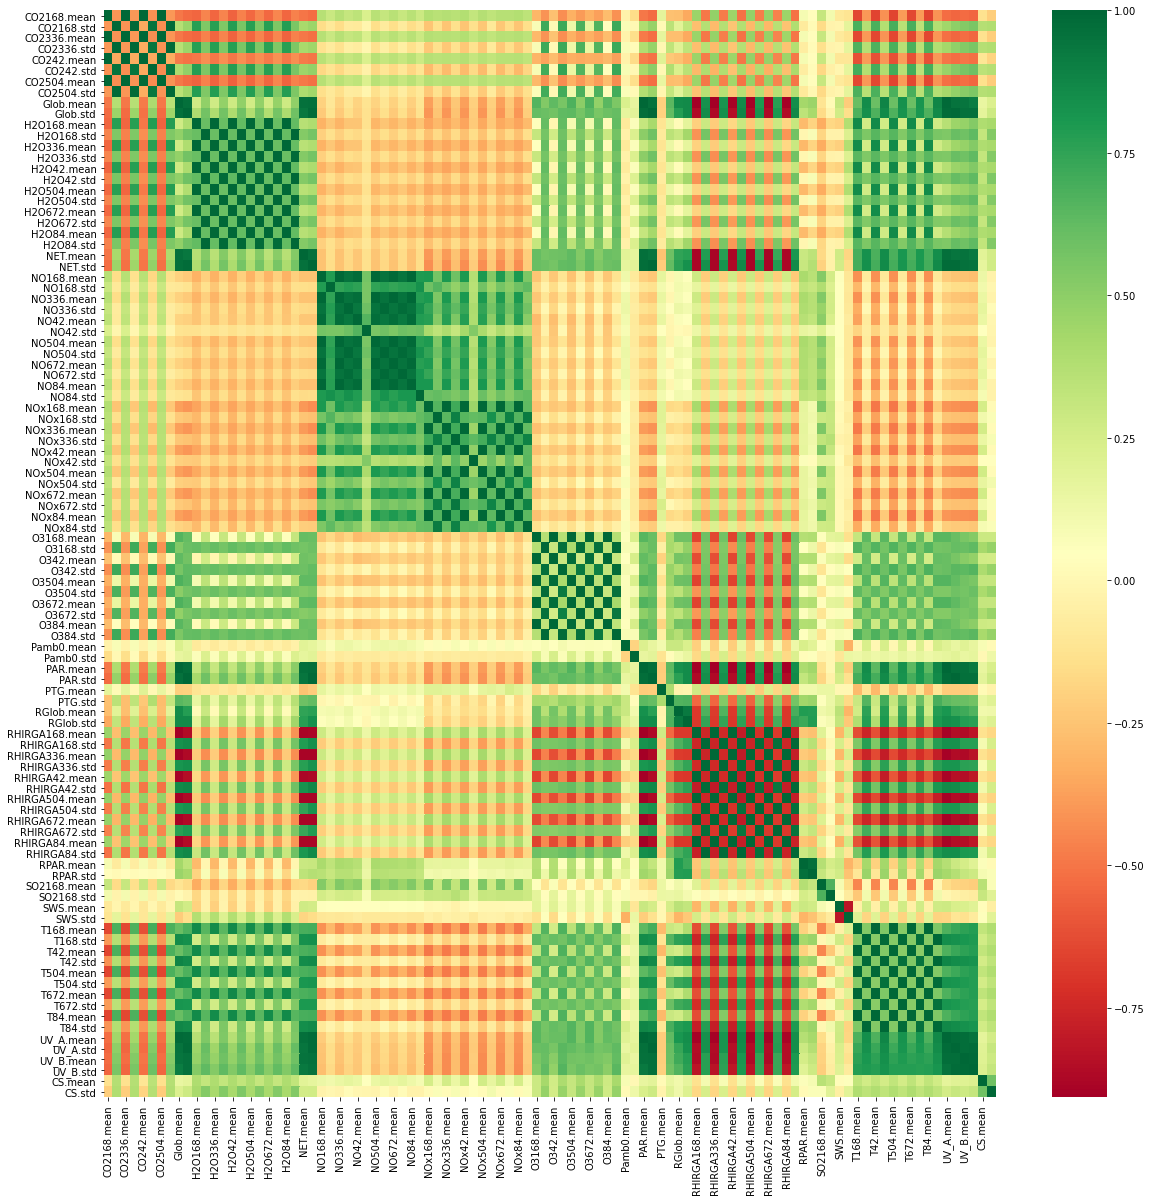

In [307]:
# Correct
corrmat = df_correct.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_correct[top_corr_features].corr(),annot=False,cmap="RdYlGn")
plt.savefig('Project_report/project_figures/df_correct_correlationmatrix.png')
plt.savefig('Project_report/project_figures/df_correct_correlationmatrix.pdf') 

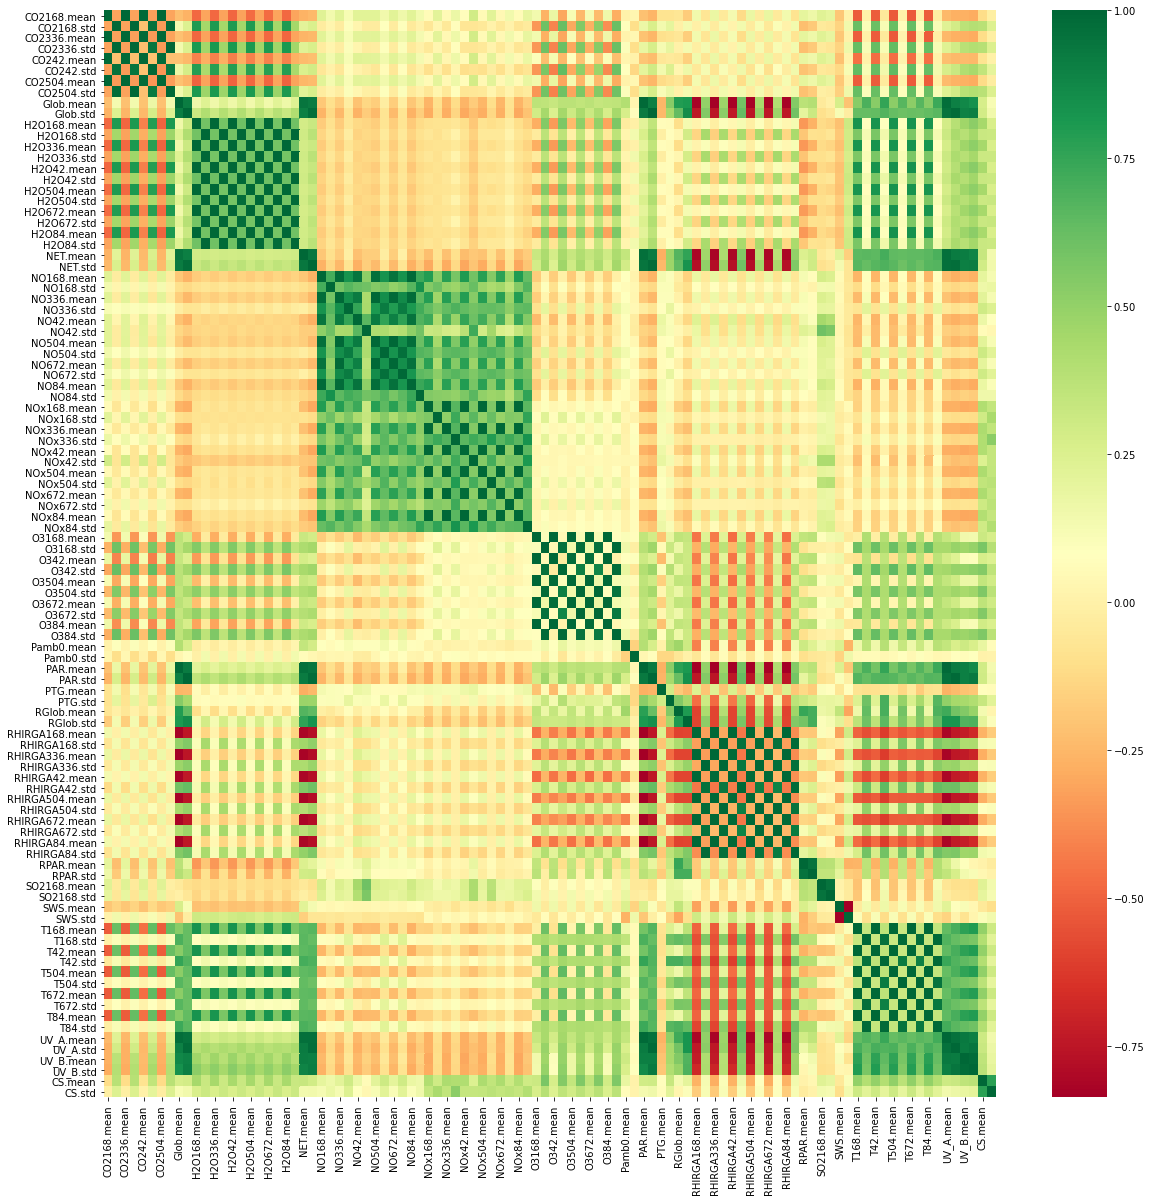

In [308]:
# Wrong
corrmat = df_wrong.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_wrong[top_corr_features].corr(),annot=False,cmap="RdYlGn")
plt.savefig('Project_report/project_figures/df_wrong_correlationmatrix.png') 
plt.savefig('Project_report/project_figures/df_wrong_correlationmatrix.pdf') 

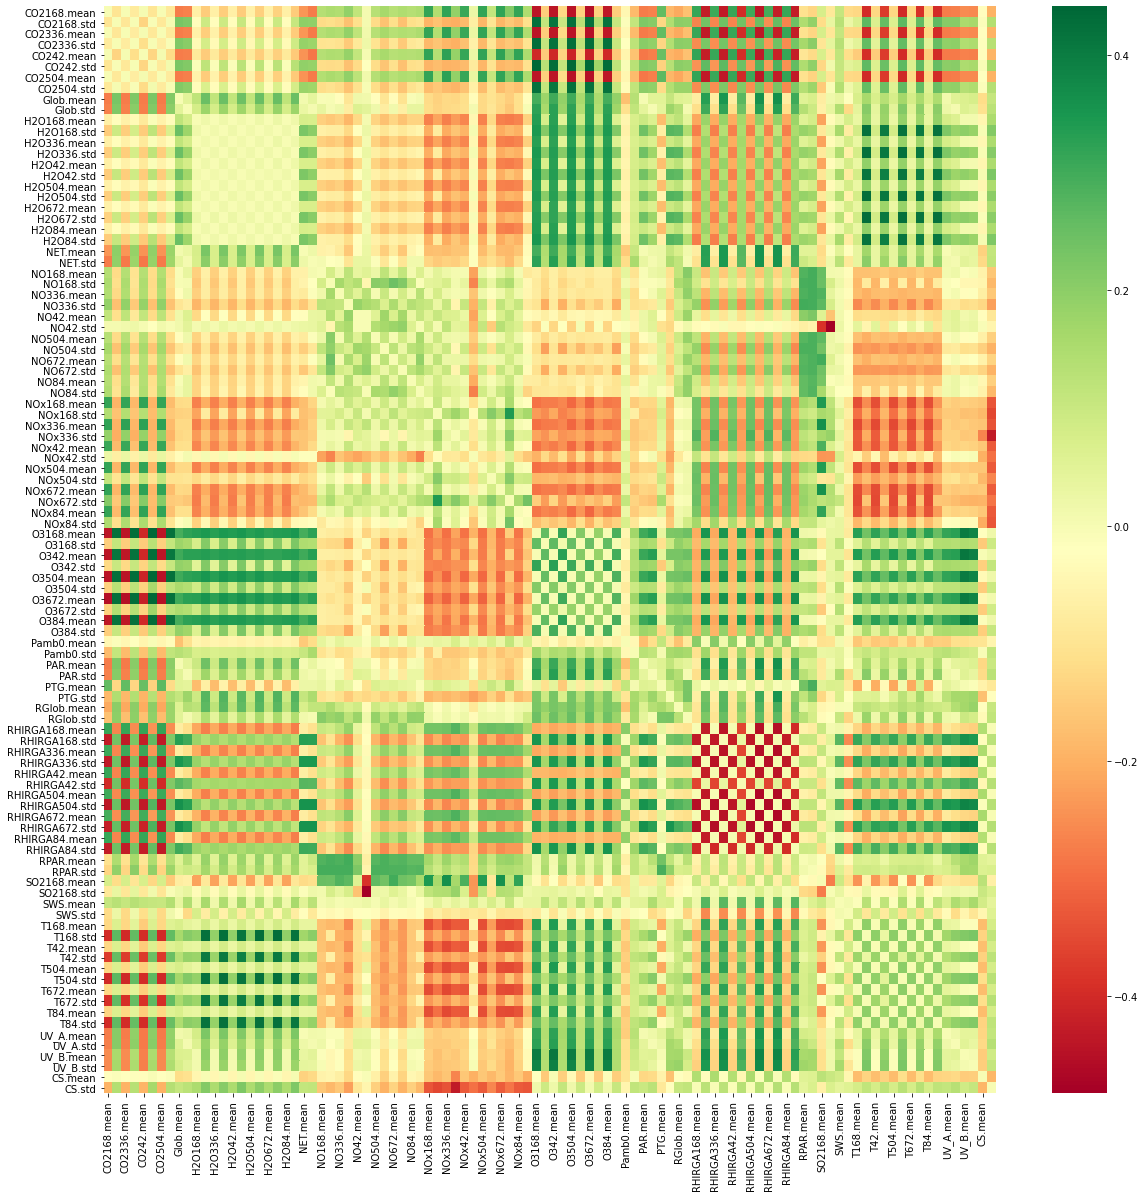

In [309]:
# Calc absolute correlation values
corrmat_correct = df_correct.corr()
corrmat_wrong = df_wrong.corr()

correlation_diff = corrmat_correct - corrmat_wrong
#correlation_diff = correlation_diff.abs()

plt.figure(figsize=(20,20))
cmap = plt.cm.get_cmap('RdYlGn')
#cmap = plt.cm.get_cmap('YlGn')
g=sns.heatmap(correlation_diff, annot=False, cmap=cmap)
plt.savefig('Project_report/project_figures/corr_matrices_difference.png') 
plt.savefig('Project_report/project_figures/corr_matrices_difference.pdf') 